# Extra Exercise Solutions
Use the human resources dataset for these problems.

In [3]:
import pandas as pd
hr = pd.read_csv('../../data/extra/hr.csv')
hr.head()

,department,salary,avg_month_hours,experience,projects,promotion,work_accident,satisfaction,evaluation,left
0,sales,low,157,3,2,0,0,0.38,0.53,1
1,sales,medium,262,6,5,0,0,0.80,0.86,1
2,sales,medium,272,4,7,0,0,0.11,0.88,1
3,sales,low,223,5,5,0,0,0.72,0.87,1
4,sales,low,159,3,2,0,0,0.37,0.52,1


### Problem 1
<span  style="color:green; font-size:16px">Without using a groupby, which salary type appears the most frequently?</span>

In [2]:
hr.salary.value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

### Problem 2
<span  style="color:green; font-size:16px">How many people have left from each department?</span>

In [3]:
hr.groupby('department')['left'].sum()

department
IT              273
RandD           121
accounting      204
hr              215
management       91
marketing       203
product_mng     198
sales          1014
support         555
technical       697
Name: left, dtype: int64

### Problem 3
<span  style="color:green; font-size:16px">Find the people that have left from each department and sort from largest to smallest.</span>

In [4]:
hr.groupby('department')['left'].sum().sort_values(ascending=False)

department
sales          1014
technical       697
support         555
IT              273
hr              215
accounting      204
marketing       203
product_mng     198
RandD           121
management       91
Name: left, dtype: int64

### Problem 4
<span  style="color:green; font-size:16px">What's the average satisfaction by salary level?</span>

In [5]:
hr.groupby('salary').agg({'satisfaction':'mean'})

,satisfaction
salary,
high,0.637470
low,0.600753
medium,0.621817


### Problem 5
<span  style="color:green; font-size:16px">Do employees with more experience have more projects?</span>

In [6]:
hr.groupby('experience')['projects'].mean()

experience
2     3.687423
3     3.327798
4     4.627689
5     4.519348
6     4.213092
7     3.851064
8     3.777778
10    3.682243
Name: projects, dtype: float64

In [7]:
%matplotlib inline

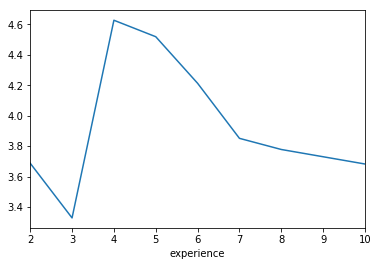

In [8]:
# doesn't look like it
hr.groupby('experience')['projects'].mean().plot()

### Problem 6
<span  style="color:green; font-size:16px">Do employees with more experience have less work accidents?</span>

In [9]:
hr.groupby('experience')['work_accident'].mean()

experience
2     0.172010
3     0.138910
4     0.124364
5     0.116090
6     0.149025
7     0.138298
8     0.271605
10    0.233645
Name: work_accident, dtype: float64

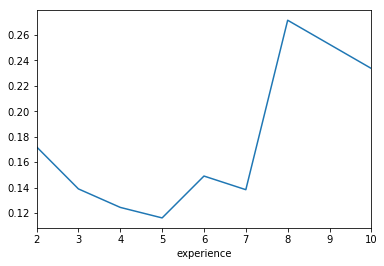

In [10]:
# they have more
hr.groupby('experience')['work_accident'].mean().plot()

### Problem 7
<span  style="color:green; font-size:16px">Which department has the most variance in number of hours worked per month?Make the departments a column name and not the index.</span>

In [11]:
hr.groupby('department')['avg_month_hours'].var().sort_values(ascending=False)

department
accounting     2612.055651
IT             2569.304867
technical      2559.968364
hr             2536.755470
product_mng    2511.276287
support        2502.369238
sales          2456.232536
marketing      2436.106542
RandD          2425.880000
management     2245.096780
Name: avg_month_hours, dtype: float64

## Use the following modified employee dataset for the next few problems

In [5]:
employee = pd.read_csv('../../data/employee.csv', parse_dates=['HIRE_DATE', 'JOB_DATE'])
employee['YEARS_EXPERIENCE'] = 2016 - employee['HIRE_DATE'].dt.year
employee['EXPERIENCE_LEVEL'] =  pd.cut(employee['YEARS_EXPERIENCE'], 
                                       bins=[0, 5, 15, 100], 
                                       labels=['Novice', 'Experienced', 'Senior'])
employee.head()

,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE,YEARS_EXPERIENCE,EXPERIENCE_LEVEL
0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13,10,Experienced
1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2000-07-19,2010-09-18,16,Senior
2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Full Time,Male,Active,2015-02-03,2015-02-03,1,Novice
3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Full Time,Male,Active,1982-02-08,1991-05-25,34,Senior
4,ELECTRICIAN,General Services Department,56347.0,White,Full Time,Male,Active,1989-06-19,1994-10-22,27,Senior


### Problem 8
<span  style="color:green; font-size:16px">For every level of experience and gender find the average salary.</span>

In [13]:
employee.groupby(['GENDER', 'EXPERIENCE_LEVEL'])['BASE_SALARY'].mean()

GENDER  EXPERIENCE_LEVEL
Female  Novice              45746.932099
        Experienced         53010.630542
        Senior              56268.731132
Male    Novice              44623.488166
        Experienced         56225.061135
        Senior              66751.208577
Name: BASE_SALARY, dtype: float64

### Problem 9
<span  style="color:green; font-size:16px">Repeat problem 8 but return it as a three column DataFrame.</span>

In [14]:
employee.groupby(['GENDER', 'EXPERIENCE_LEVEL'])['BASE_SALARY'].mean().reset_index()

,GENDER,EXPERIENCE_LEVEL,BASE_SALARY
0,Female,Novice,45746.932099
1,Female,Experienced,53010.630542
2,Female,Senior,56268.731132
3,Male,Novice,44623.488166
4,Male,Experienced,56225.061135
5,Male,Senior,66751.208577


In [15]:
employee.groupby(['GENDER', 'EXPERIENCE_LEVEL'], as_index=False)['BASE_SALARY'].mean()

,GENDER,EXPERIENCE_LEVEL,BASE_SALARY
0,Female,Novice,45746.932099
1,Female,Experienced,53010.630542
2,Female,Senior,56268.731132
3,Male,Novice,44623.488166
4,Male,Experienced,56225.061135
5,Male,Senior,66751.208577


### Problem 10
<span  style="color:green; font-size:16px">For every race and level of experience find the min, max, mean, median of the salary and the size of the group.</span>

In [16]:
employee.groupby(['RACE', 'EXPERIENCE_LEVEL'])['BASE_SALARY'].agg(['min', 'max','mean','median','size']).astype('int')

min     max   mean  \
RACE                              EXPERIENCE_LEVEL                         
American Indian or Alaskan Native Novice            26125   98536  62330   
                                  Experienced       26125   60347  47828   
                                  Senior            58855   81239  71687   
Asian/Pacific Islander            Novice            27914   93491  48441   
                                  Experienced       26125  130416  67407   
                                  Senior            31408  163228  63701   
Black or African American         Novice            24960  275000  42065   
                                  Experienced       26125  110686  48208   
                                  Senior            26125  180416  57612   
Hispanic/Latino                   Novice            26104  165216  42079   
                                  Experienced       26125  121862  53466   
                                  Senior            26125  142006  59969   
Others                            Novice            38771   63785  51278   
White                             Novice            27352  150416  53178   
                                  Experienced       26125  199596  62063   
                                  Senior            29286  210588  71508   

                                                    median  size  
RACE                              EXPERIENCE_LEVEL                
American Indian or Alaskan Native Novice             62330     2  
                                  Experienced        52420     5  
                                  Senior             73327     4  
Asian/Pacific Islander            Novice             46464    26  
                                  Experienced        60925    41  
                                  Senior             54833    40  
Black or African American         Novice             35630   198  
                                  Experienced        45063   232  
                                  Senior             57815   270  
Hispanic/Latino                   Novice             40365   142  
                                  Experienced        54600   173  
                                  Senior             63166   165  
Others                            Novice             51278     2  
White                             Novice             45791   126  
                                  Experienced        57304   214  
                                  Senior             66614   325